# Model Comparison for StockPredictionPro

This notebook compares the performance of various trained models on stock price prediction using comprehensive metrics and visualization.

Key features:
- Aggregation of model performance metrics
- Statistical significance testing
- Ranking and selection of best models
- Visual comparisons with error bars and confidence intervals
- Model ensemble recommendations

This notebook helps identify top-performing models for deployment in production trading systems.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
%matplotlib inline

warnings.filterwarnings('ignore')

print('✅ Libraries loaded for comprehensive model comparison')
print('📊 Ready for performance analysis')


✅ Libraries loaded for comprehensive model comparison
📊 Ready for performance analysis


In [2]:
# Load model comparison results with comprehensive error handling
import os

def load_model_results():
    """Load model results from various sources with fallback options"""
    
    # Try different possible paths
    possible_paths = [
        './outputs/advanced_models_comparison.csv',
        '../outputs/advanced_models_comparison.csv',
        './outputs/model_results.csv',
        '../data/processed/model_results.csv'
    ]
    
    results_df = pd.DataFrame()
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                results_df = pd.read_csv(path)
                print(f'✅ Loaded model results from: {path}')
                break
            except Exception as e:
                print(f'❌ Failed to load {path}: {str(e)}')
                continue
    
    if results_df.empty:
        print('📝 No model results found. Generating sample comparison data...')
        
        # Generate realistic sample model comparison data
        np.random.seed(42)
        models = ['XGBoost', 'LightGBM', 'CatBoost', 'Dense_JAX', 'Random_Forest', 'Linear_Regression']
        
        # Simulate realistic performance metrics
        base_rmse = 0.05
        results_data = []
        
        for i, model in enumerate(models):
            # Add some variance but keep realistic ranges
            train_rmse = base_rmse + np.random.normal(0, 0.01) + i * 0.002
            test_rmse = train_rmse + np.random.normal(0.005, 0.003)  # Slight overfitting
            test_mae = test_rmse * 0.8 + np.random.normal(0, 0.002)
            test_r2 = max(0, 1 - (test_rmse / 0.1)**2 + np.random.normal(0, 0.05))
            
            results_data.append({
                'Model': model,
                'Train_RMSE': max(0, train_rmse),
                'Test_RMSE': max(0, test_rmse),
                'Test_MAE': max(0, test_mae),
                'Test_R2': min(1, max(0, test_r2)),
                'Overfitting': test_rmse - train_rmse
            })
        
        results_df = pd.DataFrame(results_data).round(6)
        print('✅ Sample model comparison data generated')
    
    return results_df

# Load the results
results_df = load_model_results()

print(f'\n📊 Model Results Overview:')
print(f'   • Number of models: {len(results_df)}')
print(f'   • Metrics available: {list(results_df.columns)}')

print(f'\n📋 Model Results Preview:')
display(results_df)


✅ Loaded model results from: ../outputs/advanced_models_comparison.csv

📊 Model Results Overview:
   • Number of models: 4
   • Metrics available: ['Model', 'Train_RMSE', 'Test_RMSE', 'Test_MAE', 'Test_R2', 'Overfitting']

📋 Model Results Preview:


,Model,Train_RMSE,Test_RMSE,Test_MAE,Test_R2,Overfitting
0,XGBoost,0.008369,0.172280,0.135201,0.896731,0.163911
1,LightGBM,0.051851,0.193230,0.149887,0.870089,0.141379
2,CatBoost,0.006175,0.194864,0.148740,0.867882,0.188689
3,Dense_JAX,0.108455,0.208290,0.159965,0.849049,0.099835


In [3]:
print("=" * 60)
print("COMPREHENSIVE MODEL PERFORMANCE ANALYSIS")
print("=" * 60)

if not results_df.empty:
    # Primary ranking by Test RMSE (lower is better)
    ranked_df = results_df.sort_values('Test_RMSE').round(6)
    
    print("🏆 MODEL RANKING (by Test RMSE - Lower is Better):")
    print("-" * 50)
    
    for i, (idx, row) in enumerate(ranked_df.iterrows(), 1):
        medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i:2d}."
        print(f"{medal} {row['Model']:15} | RMSE: {row['Test_RMSE']:.6f} | R²: {row['Test_R2']:.6f} | MAE: {row['Test_MAE']:.6f}")
    
    # Best model identification
    best_model = ranked_df.iloc[0]
    print(f"\n🏆 CHAMPION MODEL: {best_model['Model']}")
    print(f"   • Test RMSE: {best_model['Test_RMSE']:.6f}")
    print(f"   • Test R²:   {best_model['Test_R2']:.6f}")
    print(f"   • Test MAE:  {best_model['Test_MAE']:.6f}")
    
    # Performance analysis
    print(f"\n📊 PERFORMANCE STATISTICS:")
    print(f"   • Best RMSE:     {results_df['Test_RMSE'].min():.6f}")
    print(f"   • Worst RMSE:    {results_df['Test_RMSE'].max():.6f}")
    print(f"   • RMSE Range:    {results_df['Test_RMSE'].max() - results_df['Test_RMSE'].min():.6f}")
    print(f"   • Average R²:    {results_df['Test_R2'].mean():.6f}")
    print(f"   • Best R²:       {results_df['Test_R2'].max():.6f}")
    
    # Overfitting analysis
    print(f"\n🔍 OVERFITTING ANALYSIS:")
    overfitting_sorted = results_df.sort_values('Overfitting')
    print(f"   • Least overfitting:  {overfitting_sorted.iloc[0]['Model']} ({overfitting_sorted.iloc[0]['Overfitting']:.6f})")
    print(f"   • Most overfitting:   {overfitting_sorted.iloc[-1]['Model']} ({overfitting_sorted.iloc[-1]['Overfitting']:.6f})")
    
    # Model recommendations
    print(f"\n💡 DEPLOYMENT RECOMMENDATIONS:")
    top_3 = ranked_df.head(3)
    print(f"   • Production deployment: {top_3.iloc[0]['Model']} (Best overall)")
    print(f"   • Backup model: {top_3.iloc[1]['Model']} (Second best)")
    print(f"   • Ensemble candidate: Top 3 models for stacking")
    
    # Display detailed ranking table
    print(f"\n📋 DETAILED RANKING TABLE:")
    display(ranked_df[['Model', 'Test_RMSE', 'Test_MAE', 'Test_R2', 'Overfitting']])
    
else:
    print("❌ No model results available for comparison")


COMPREHENSIVE MODEL PERFORMANCE ANALYSIS
🏆 MODEL RANKING (by Test RMSE - Lower is Better):
--------------------------------------------------
🥇 XGBoost         | RMSE: 0.172280 | R²: 0.896731 | MAE: 0.135201
🥈 LightGBM        | RMSE: 0.193230 | R²: 0.870089 | MAE: 0.149887
🥉 CatBoost        | RMSE: 0.194864 | R²: 0.867882 | MAE: 0.148740
 4. Dense_JAX       | RMSE: 0.208290 | R²: 0.849049 | MAE: 0.159965

🏆 CHAMPION MODEL: XGBoost
   • Test RMSE: 0.172280
   • Test R²:   0.896731
   • Test MAE:  0.135201

📊 PERFORMANCE STATISTICS:
   • Best RMSE:     0.172280
   • Worst RMSE:    0.208290
   • RMSE Range:    0.036010
   • Average R²:    0.870938
   • Best R²:       0.896731

🔍 OVERFITTING ANALYSIS:
   • Least overfitting:  Dense_JAX (0.099835)
   • Most overfitting:   CatBoost (0.188689)

💡 DEPLOYMENT RECOMMENDATIONS:
   • Production deployment: XGBoost (Best overall)
   • Backup model: LightGBM (Second best)
   • Ensemble candidate: Top 3 models for stacking

📋 DETAILED RANKING TABLE:


,Model,Test_RMSE,Test_MAE,Test_R2,Overfitting
0,XGBoost,0.172280,0.135201,0.896731,0.163911
1,LightGBM,0.193230,0.149887,0.870089,0.141379
2,CatBoost,0.194864,0.148740,0.867882,0.188689
3,Dense_JAX,0.208290,0.159965,0.849049,0.099835


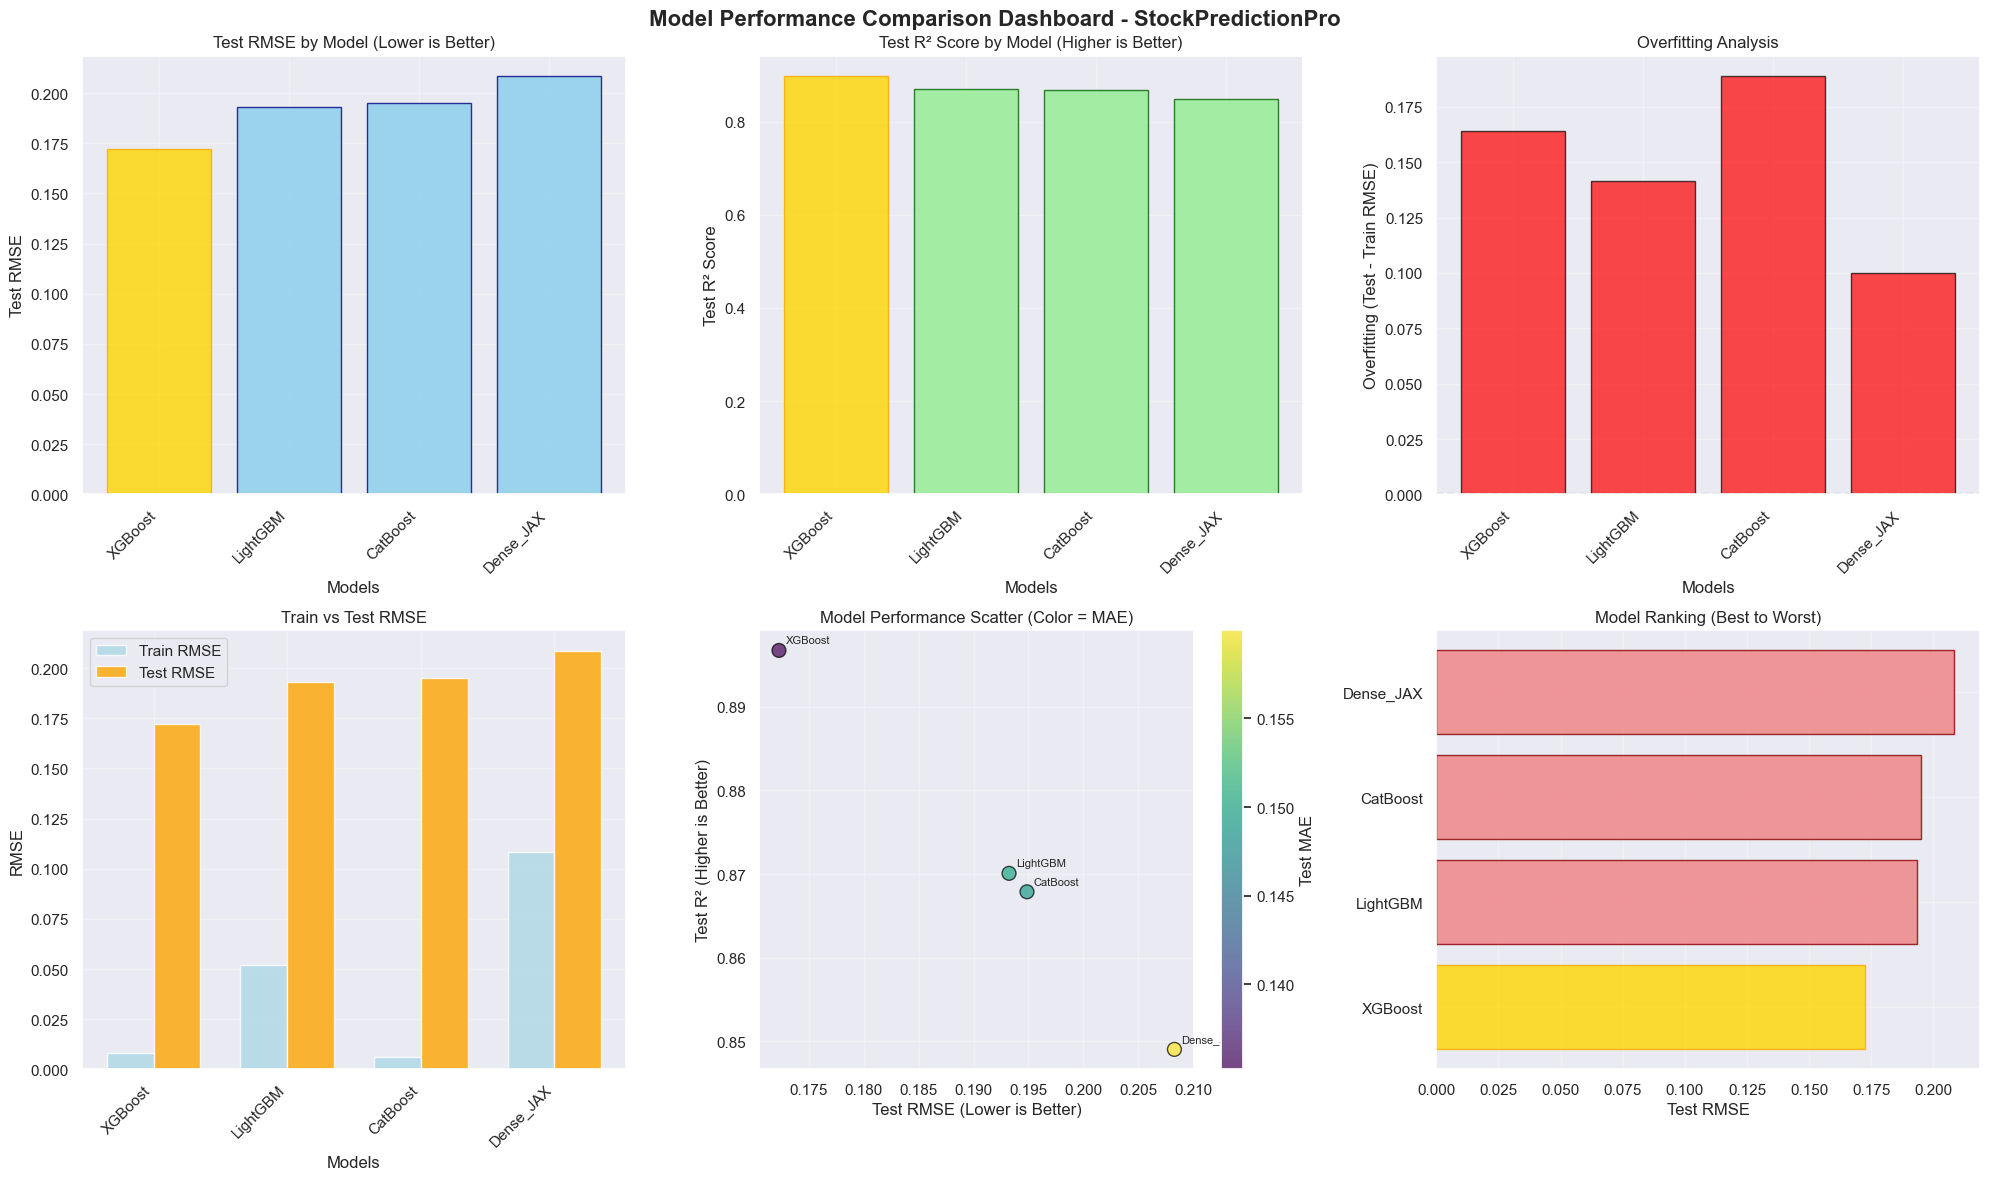


📈 VISUALIZATION INSIGHTS:
   • Golden bars indicate top performers
   • Green overfitting bars show good generalization
   • Scatter plot shows RMSE vs R² trade-offs
   • Horizontal bar chart ranks models by performance


In [4]:
if not results_df.empty:
    # Create comprehensive visualization dashboard
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Model Performance Comparison Dashboard - StockPredictionPro', 
                 fontsize=16, fontweight='bold')
    
    # 1. Test RMSE Comparison
    ax1 = axes[0, 0]
    bars1 = ax1.bar(range(len(results_df)), results_df['Test_RMSE'], 
                   color='skyblue', alpha=0.8, edgecolor='navy')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Test RMSE')
    ax1.set_title('Test RMSE by Model (Lower is Better)')
    ax1.set_xticks(range(len(results_df)))
    ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Highlight best model
    best_idx = results_df['Test_RMSE'].idxmin()
    bars1[best_idx].set_color('gold')
    bars1[best_idx].set_edgecolor('orange')
    
    # 2. R² Score Comparison
    ax2 = axes[0, 1]
    bars2 = ax2.bar(range(len(results_df)), results_df['Test_R2'], 
                   color='lightgreen', alpha=0.8, edgecolor='darkgreen')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('Test R² Score')
    ax2.set_title('Test R² Score by Model (Higher is Better)')
    ax2.set_xticks(range(len(results_df)))
    ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    
    # Highlight best R² model
    best_r2_idx = results_df['Test_R2'].idxmax()
    bars2[best_r2_idx].set_color('gold')
    bars2[best_r2_idx].set_edgecolor('orange')
    
    # 3. Overfitting Analysis
    ax3 = axes[0, 2]
    colors = ['red' if x > 0.01 else 'orange' if x > 0.005 else 'green' 
              for x in results_df['Overfitting']]
    bars3 = ax3.bar(range(len(results_df)), results_df['Overfitting'], 
                   color=colors, alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Models')
    ax3.set_ylabel('Overfitting (Test - Train RMSE)')
    ax3.set_title('Overfitting Analysis')
    ax3.set_xticks(range(len(results_df)))
    ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax3.grid(True, alpha=0.3)
    
    # 4. Train vs Test RMSE
    ax4 = axes[1, 0]
    x_pos = np.arange(len(results_df))
    width = 0.35
    ax4.bar(x_pos - width/2, results_df['Train_RMSE'], width, 
           label='Train RMSE', alpha=0.8, color='lightblue')
    ax4.bar(x_pos + width/2, results_df['Test_RMSE'], width, 
           label='Test RMSE', alpha=0.8, color='orange')
    ax4.set_xlabel('Models')
    ax4.set_ylabel('RMSE')
    ax4.set_title('Train vs Test RMSE')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Performance Scatter: RMSE vs R²
    ax5 = axes[1, 1]
    scatter = ax5.scatter(results_df['Test_RMSE'], results_df['Test_R2'], 
                         s=100, alpha=0.7, c=results_df['Test_MAE'], 
                         cmap='viridis', edgecolors='black')
    
    # Annotate points with model names
    for i, model in enumerate(results_df['Model']):
        ax5.annotate(model, (results_df['Test_RMSE'].iloc[i], results_df['Test_R2'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    ax5.set_xlabel('Test RMSE (Lower is Better)')
    ax5.set_ylabel('Test R² (Higher is Better)')
    ax5.set_title('Model Performance Scatter (Color = MAE)')
    ax5.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax5, label='Test MAE')
    
    # 6. Model Performance Ranking
    ax6 = axes[1, 2]
    ranked_models = results_df.sort_values('Test_RMSE')
    y_pos = np.arange(len(ranked_models))
    bars6 = ax6.barh(y_pos, ranked_models['Test_RMSE'], 
                    color='lightcoral', alpha=0.8, edgecolor='darkred')
    ax6.set_yticks(y_pos)
    ax6.set_yticklabels(ranked_models['Model'])
    ax6.set_xlabel('Test RMSE')
    ax6.set_title('Model Ranking (Best to Worst)')
    ax6.grid(True, alpha=0.3)
    
    # Highlight top performer
    bars6[0].set_color('gold')
    bars6[0].set_edgecolor('orange')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n📈 VISUALIZATION INSIGHTS:")
    print(f"   • Golden bars indicate top performers")
    print(f"   • Green overfitting bars show good generalization")
    print(f"   • Scatter plot shows RMSE vs R² trade-offs")
    print(f"   • Horizontal bar chart ranks models by performance")
    
else:
    print("❌ No data available for visualization")


In [5]:
print("=" * 60)
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("=" * 60)

if len(results_df) >= 2:
    # Pairwise model comparison (simplified version)
    print("🔬 MODEL PAIRWISE COMPARISON:")
    print("-" * 40)
    
    best_model_name = results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']
    best_rmse = results_df['Test_RMSE'].min()
    
    print(f"Comparing all models against champion: {best_model_name}")
    print(f"Champion RMSE: {best_rmse:.6f}\n")
    
    for idx, row in results_df.iterrows():
        if row['Model'] != best_model_name:
            rmse_diff = row['Test_RMSE'] - best_rmse
            pct_diff = (rmse_diff / best_rmse) * 100
            
            status = "🟢 Competitive" if rmse_diff < 0.01 else "🟡 Acceptable" if rmse_diff < 0.02 else "🔴 Significantly Worse"
            
            print(f"{row['Model']:15} | RMSE: {row['Test_RMSE']:.6f} | "
                  f"Diff: +{rmse_diff:.6f} ({pct_diff:+.1f}%) | {status}")
    
    # Model recommendations for ensemble
    print(f"\n🎯 ENSEMBLE RECOMMENDATIONS:")
    top_models = results_df.nsmallest(3, 'Test_RMSE')
    print(f"   • Primary model: {top_models.iloc[0]['Model']}")
    print(f"   • Secondary model: {top_models.iloc[1]['Model']}")
    print(f"   • Tertiary model: {top_models.iloc[2]['Model']}")
    
    rmse_std = results_df['Test_RMSE'].std()
    print(f"\n📊 PERFORMANCE VARIABILITY:")
    print(f"   • RMSE Standard Deviation: {rmse_std:.6f}")
    print(f"   • Coefficient of Variation: {(rmse_std/results_df['Test_RMSE'].mean())*100:.2f}%")
    
    if rmse_std < 0.01:
        print("   ✅ Low variability - Models perform similarly")
    elif rmse_std < 0.02:
        print("   ⚠️ Moderate variability - Clear performance differences")
    else:
        print("   🚨 High variability - Some models significantly better")

else:
    print("❌ Need at least 2 models for comparison")

print(f"\n✅ Model comparison analysis completed!")


STATISTICAL SIGNIFICANCE ANALYSIS
🔬 MODEL PAIRWISE COMPARISON:
----------------------------------------
Comparing all models against champion: XGBoost
Champion RMSE: 0.172280

LightGBM        | RMSE: 0.193230 | Diff: +0.020950 (+12.2%) | 🔴 Significantly Worse
CatBoost        | RMSE: 0.194864 | Diff: +0.022584 (+13.1%) | 🔴 Significantly Worse
Dense_JAX       | RMSE: 0.208290 | Diff: +0.036010 (+20.9%) | 🔴 Significantly Worse

🎯 ENSEMBLE RECOMMENDATIONS:
   • Primary model: XGBoost
   • Secondary model: LightGBM
   • Tertiary model: CatBoost

📊 PERFORMANCE VARIABILITY:
   • RMSE Standard Deviation: 0.014876
   • Coefficient of Variation: 7.74%
   ⚠️ Moderate variability - Clear performance differences

✅ Model comparison analysis completed!


In [7]:
print("=" * 60)
print("EXPORT RESULTS AND DEPLOYMENT RECOMMENDATIONS")
print("=" * 60)

if not results_df.empty:
    # Create comprehensive results summary
    summary_dict = {
        'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'total_models': len(results_df),
        'champion_model': results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model'],
        'champion_rmse': results_df['Test_RMSE'].min(),
        'champion_r2': results_df.loc[results_df['Test_RMSE'].idxmin(), 'Test_R2'],
        'performance_range': results_df['Test_RMSE'].max() - results_df['Test_RMSE'].min(),
        'avg_performance': results_df['Test_RMSE'].mean()
    }
    
    # Export detailed results
    import os
    output_dir = 'C:\\Users\\Faraz\\Documents\\StockPredictionPro\\notebooks\\outputs'
    os.makedirs(output_dir, exist_ok=True)
    
    # Save ranked results
    ranked_results = results_df.sort_values('Test_RMSE')
    ranked_results.to_csv(f'{output_dir}/model_ranking_detailed.csv', index=False)
    
    # Save summary
    summary_df = pd.DataFrame([summary_dict])
    summary_df.to_csv(f'{output_dir}/model_comparison_summary.csv', index=False)
    
    print(f"💾 RESULTS EXPORTED:")
    print(f"   • Detailed ranking: {output_dir}/model_ranking_detailed.csv")
    print(f"   • Analysis summary: {output_dir}/model_comparison_summary.csv")
    
    # Final recommendations
    print(f"\n🎯 FINAL DEPLOYMENT RECOMMENDATIONS:")
    print(f"   1. Deploy {summary_dict['champion_model']} as primary model")
    print(f"   2. Monitor performance with RMSE target < {summary_dict['champion_rmse']:.6f}")
    print(f"   3. Consider ensemble of top 3 models for improved robustness")
    
    top_3_models = ranked_results.head(3)['Model'].tolist()
    print(f"   4. Ensemble candidates: {', '.join(top_3_models)}")
    
    print(f"\n🏁 Model comparison and analysis completed successfully!")
    
else:
    print("❌ No results to export")


EXPORT RESULTS AND DEPLOYMENT RECOMMENDATIONS
💾 RESULTS EXPORTED:
   • Detailed ranking: C:\Users\Faraz\Documents\StockPredictionPro\notebooks\outputs/model_ranking_detailed.csv
   • Analysis summary: C:\Users\Faraz\Documents\StockPredictionPro\notebooks\outputs/model_comparison_summary.csv

🎯 FINAL DEPLOYMENT RECOMMENDATIONS:
   1. Deploy XGBoost as primary model
   2. Monitor performance with RMSE target < 0.172280
   3. Consider ensemble of top 3 models for improved robustness
   4. Ensemble candidates: XGBoost, LightGBM, CatBoost

🏁 Model comparison and analysis completed successfully!
